In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'D:\DS-assignment')
df = pd.read_excel('ds.xlsx')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df.shape

(414, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
from datetime import datetime
df['Transaction date']=pd.to_datetime(df['Transaction date'])

In [7]:
df = df.drop(df.columns[[0]], axis=1)

We can drop Transaction Date column as it does not have much relevance in predicting the price of the house.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    int64  
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    int64  
 6   House size (sqft)                         414 non-null    int64  
 7   House price of unit area                  414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


In [9]:
df.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [10]:
df.isnull().sum() / df.shape[0] * 100

House Age                                   0.0
Distance from nearest Metro station (km)    0.0
Number of convenience stores                0.0
latitude                                    0.0
longitude                                   0.0
Number of bedrooms                          0.0
House size (sqft)                           0.0
House price of unit area                    0.0
dtype: float64

There are no null values in the dataset.

In [11]:
df_cat = df.select_dtypes(include = "object")
df_num = df.select_dtypes(exclude = "object")

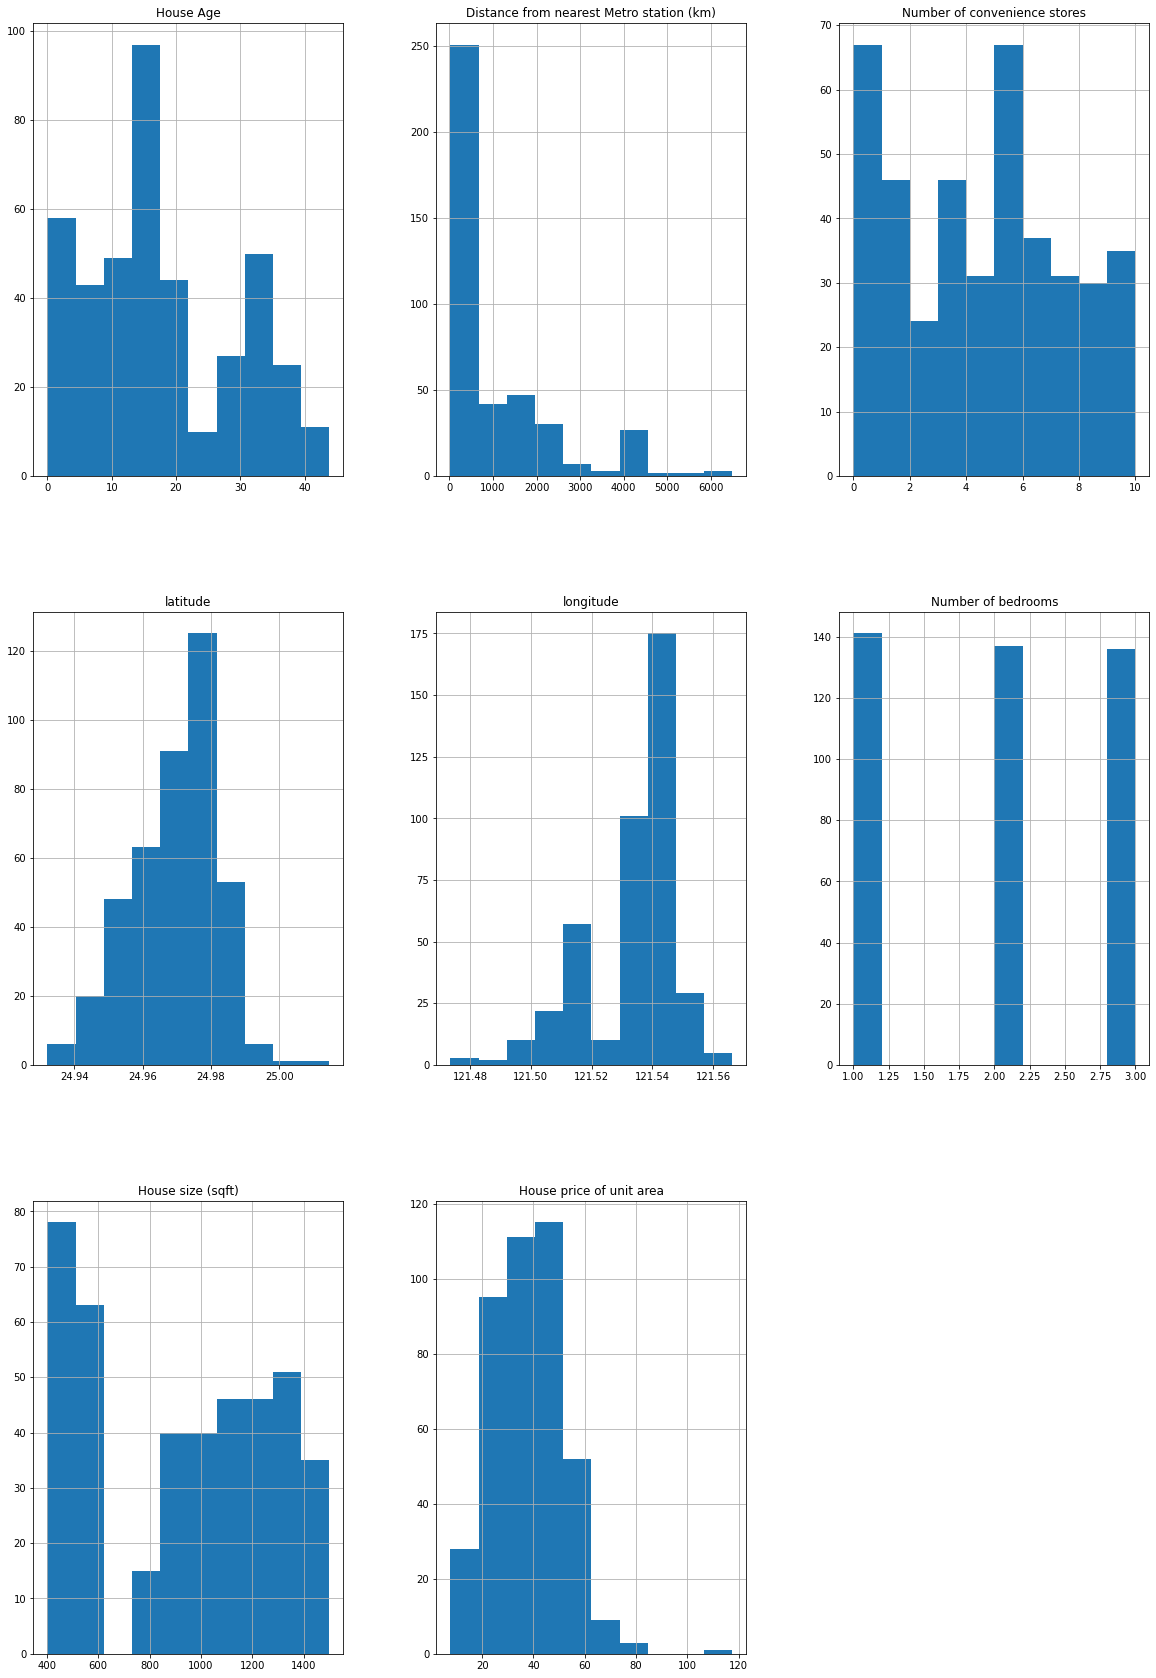

In [12]:
plt.rcParams['figure.figsize'] = (20,30)
df_num.hist()
plt.show()

<AxesSubplot:xlabel='Number of bedrooms', ylabel='House size (sqft)'>

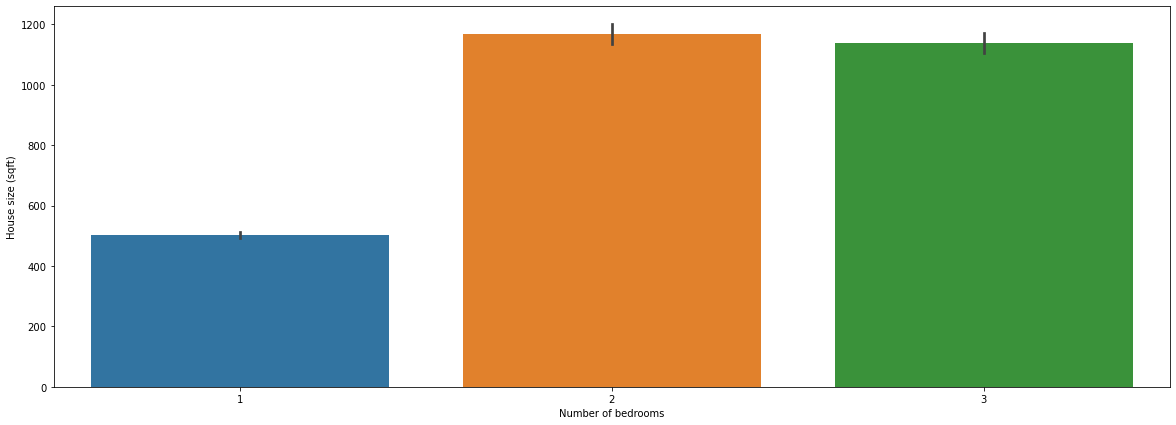

In [13]:
plt.figure(figsize=(20,7))
sns.barplot(data=df, x="Number of bedrooms", y="House size (sqft)")

D:\All\Anaconda Installation\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

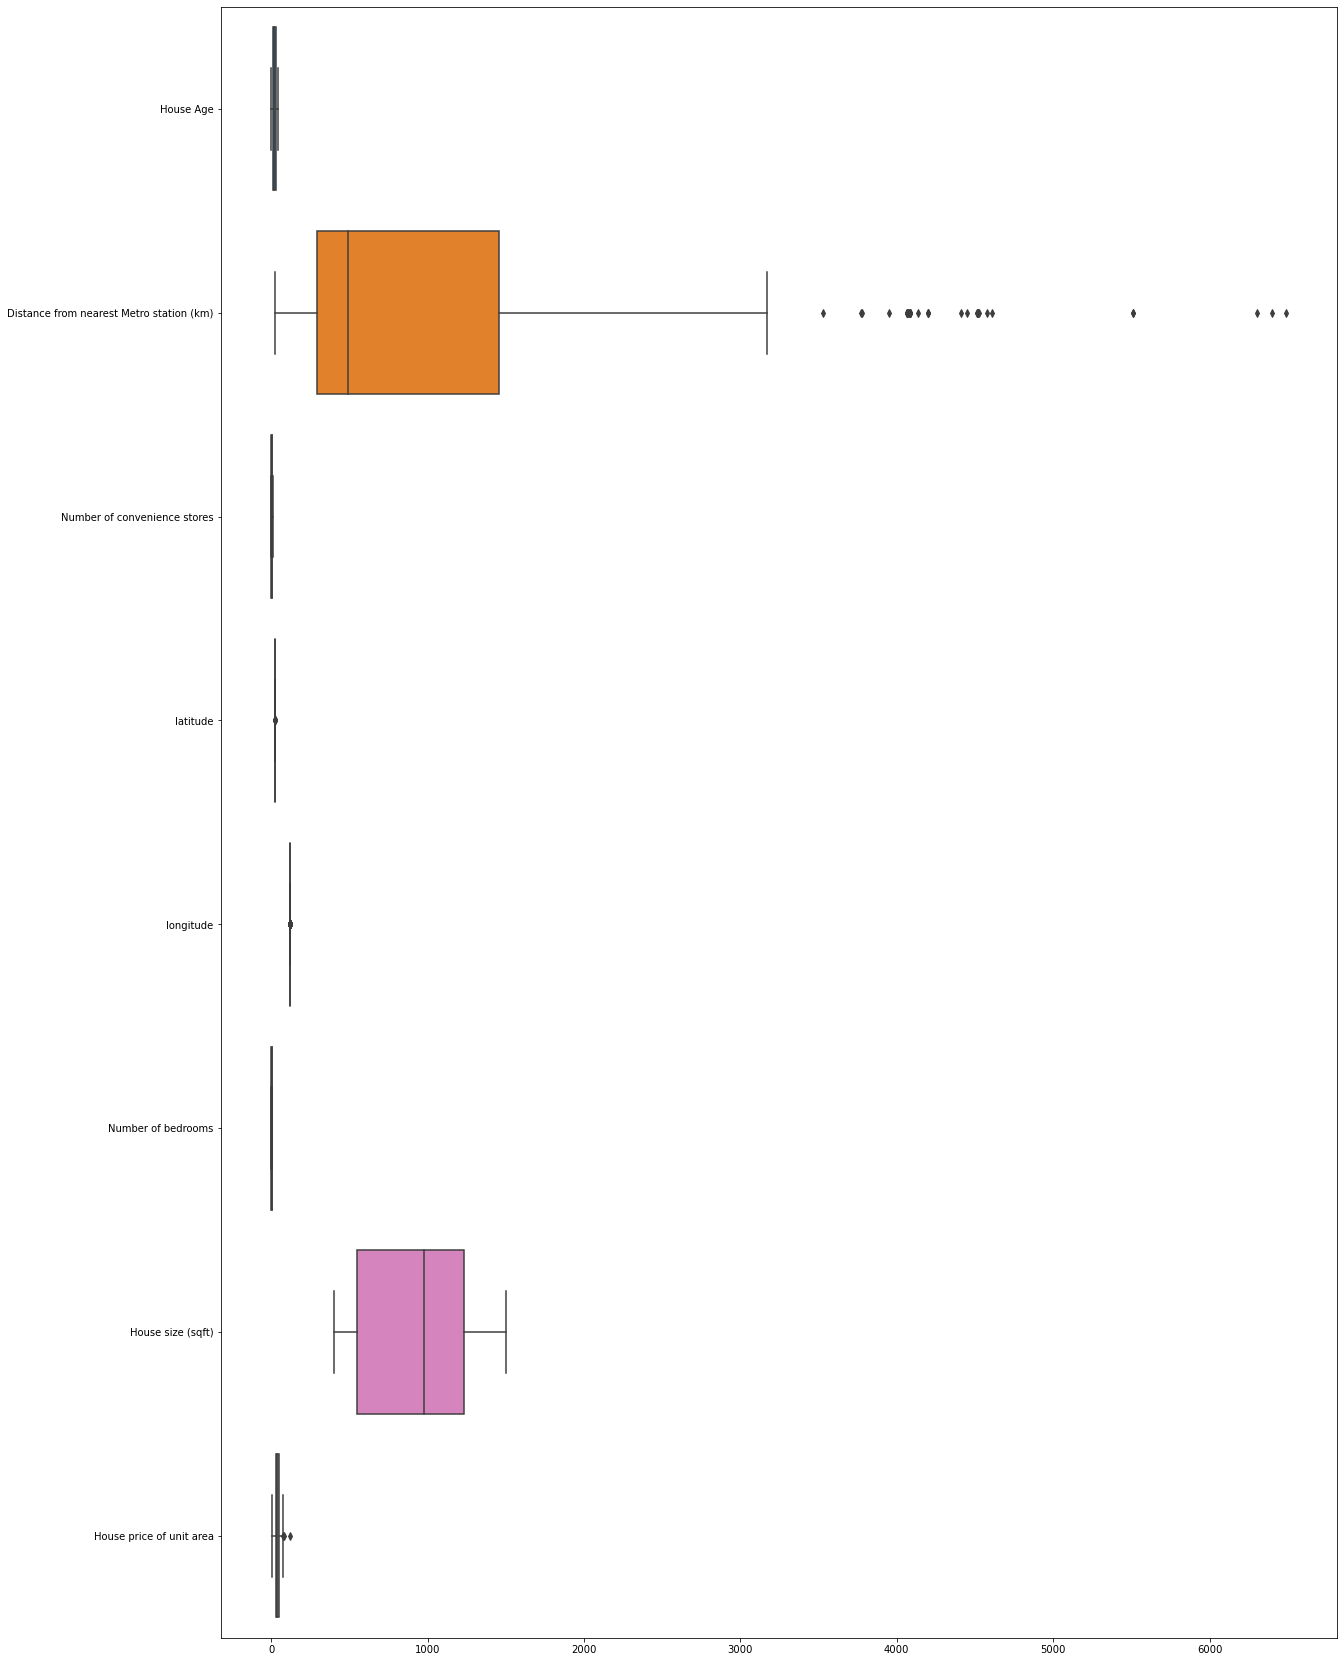

In [14]:
sns.boxplot(data=df, orient="h")

The boxplot shows that there are many outliers in the dataset. However, due to different scales of the data the boxplots do not look much attractive.

In [15]:
for column in df_num:
    df_num[column] = (df_num[column] -
                           df_num[column].mean()) / df_num[column].std()

Normalizing the data above.

In [16]:
df_combine = pd.concat([df_cat,df_num], axis = 1)

In [17]:
df_combine.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,1.254111,-0.791537,2.004982,1.124070,0.448220,-1.206439,-1.021683,-0.005894
1,0.156896,-0.615866,1.665488,0.911342,0.400654,0.014749,0.884251,0.310132
2,-0.387322,-0.413515,0.307513,1.485063,0.687352,1.235937,0.368359,0.684953
3,-0.387322,-0.413515,0.307513,1.485063,0.687352,0.014749,-0.161864,1.236161
4,-1.115873,-0.549332,0.307513,0.833180,0.592220,-1.206439,-1.262433,0.376277


D:\All\Anaconda Installation\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

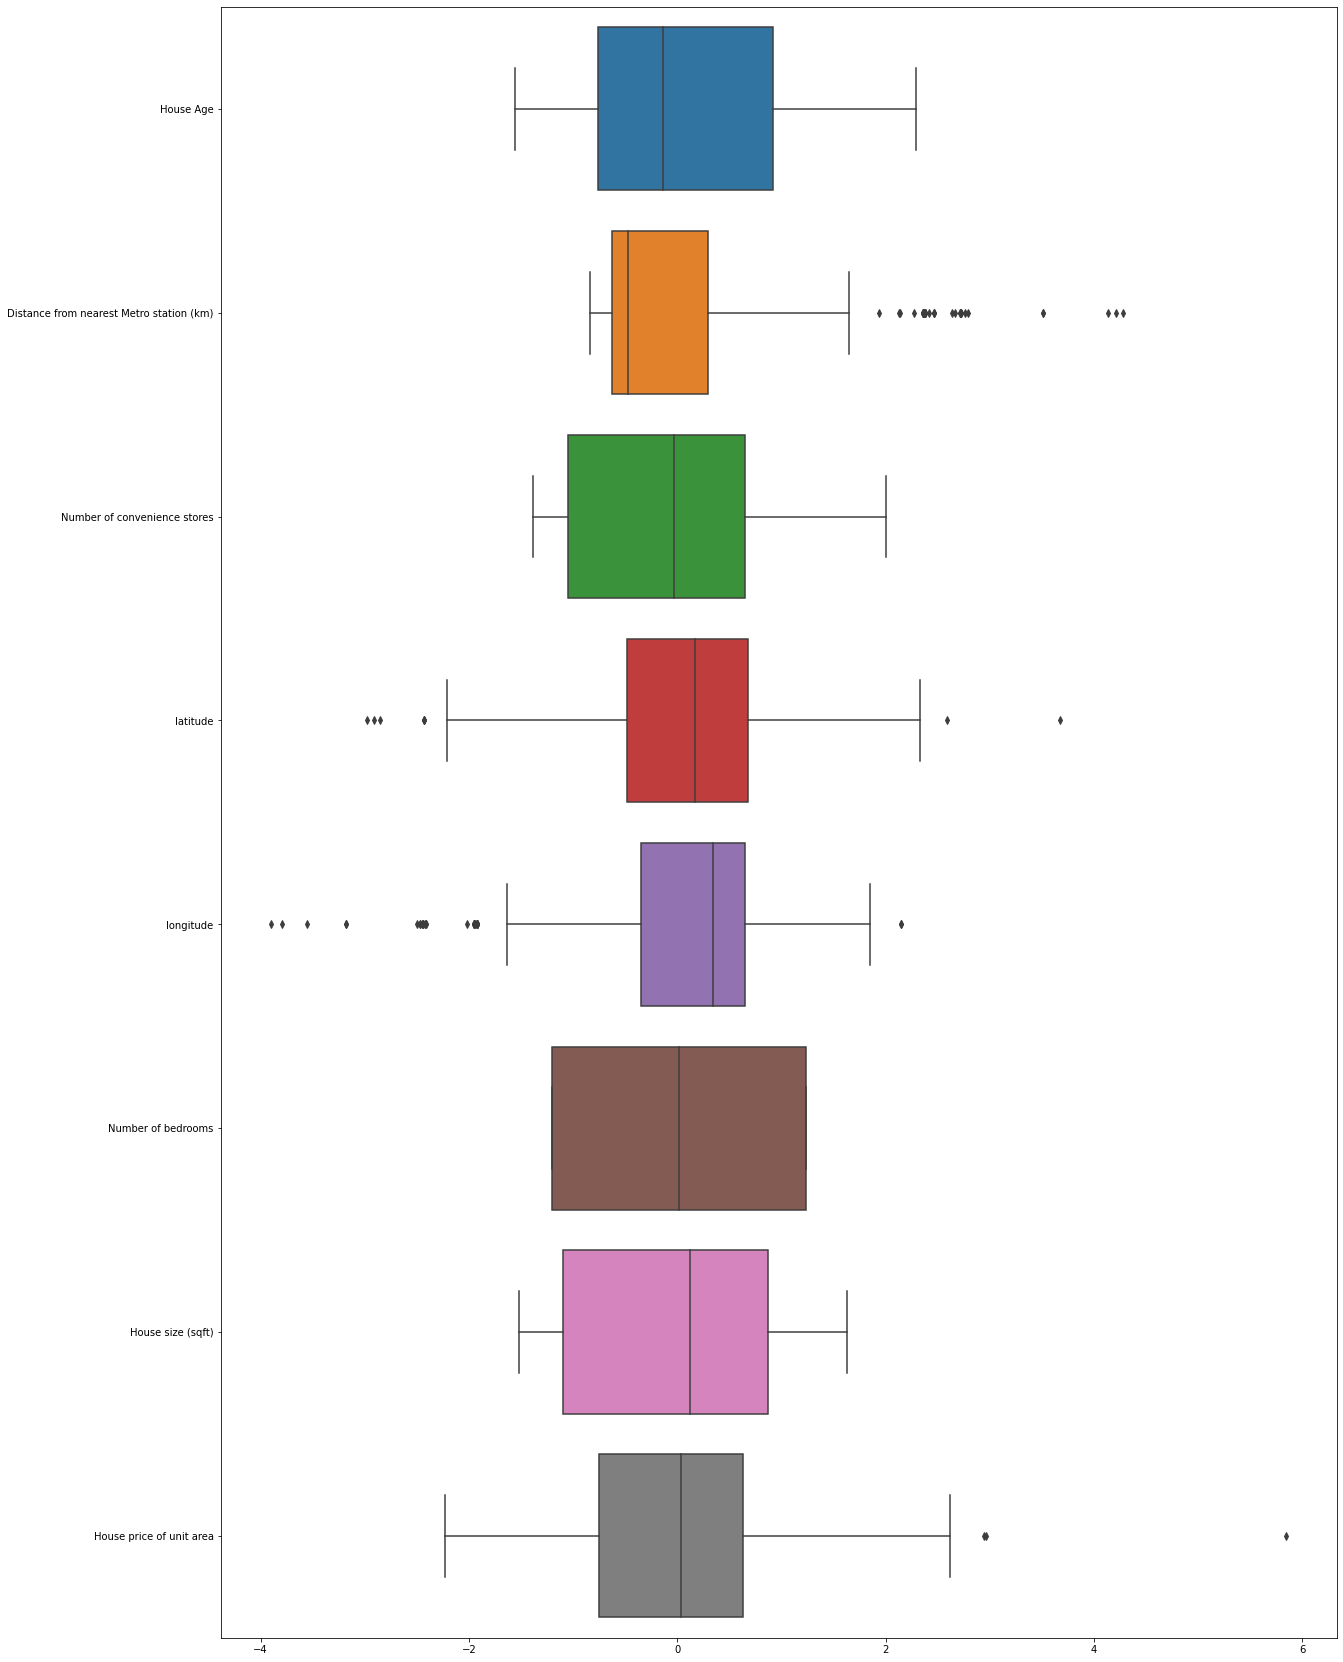

In [18]:
sns.boxplot(data=df_combine, orient="h")

The boxplot shows that there are many outliers in the dataset. We will treat them separately. 

<AxesSubplot:>

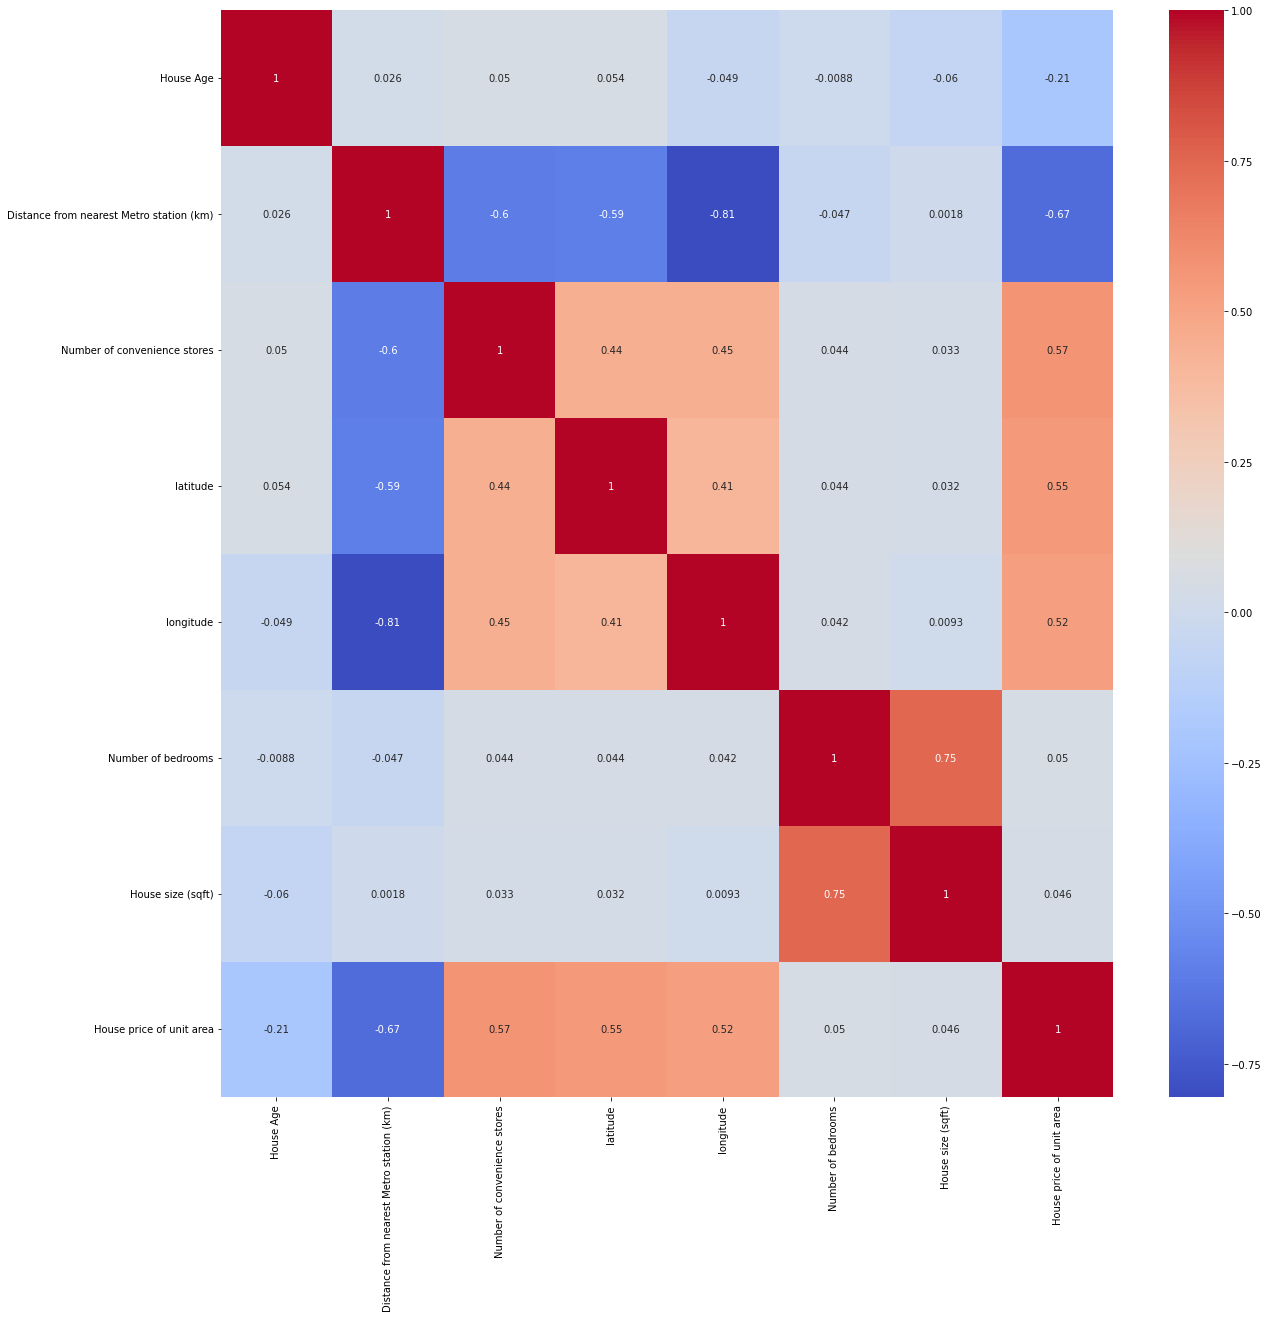

In [19]:
corrMatrix = df_combine.corr()

plt.figure(figsize = (20,20))
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

The correlation matrix shows that there are many variables which are correlated. This can affect the performance of our data.

In [20]:
x1 = df_combine.drop(df.columns[[7]], axis=1)
y1 = df_combine['House price of unit area']

In [21]:
import statsmodels.api as sm
model1 = sm.OLS(y1, x1).fit() 

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     House price of unit area   R-squared (uncentered):                   0.572
Model:                                  OLS   Adj. R-squared (uncentered):              0.564
Method:                       Least Squares   F-statistic:                              77.56
Date:                      Tue, 29 Nov 2022   Prob (F-statistic):                    5.60e-71
Time:                              14:22:21   Log-Likelihood:                         -411.49
No. Observations:                       414   AIC:                                      837.0
Df Residuals:                           407   BIC:                                      865.2
Df Model:                                 7                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
House Age                                   -0.2235      0.033     -6.813      0.000      -0.288      -0.159
Distance from nearest Metro station (km)    -0.3978      0.067     -5.906      0.000      -0.530      -0.265
Number of convenience stores                 0.2505      0.041      6.072      0.000       0.169       0.332
latitude                                     0.2157      0.041      5.252      0.000       0.135       0.296
longitude                                   -0.0097      0.056     -0.175      0.861      -0.119       0.099
Number of bedrooms                          -0.0100      0.049     -0.202      0.840      -0.107       0.087
House size (sqft)                            0.0262      0.050      0.527      0.598      -0.071       0.124
==============================================================================
Omnibus:                      237.529   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3628.444
Skew:                           2.105   Prob(JB):                         0.00
Kurtosis:                      16.879   Cond. No.                         4.23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Only 56.4% of the variance in the house prices can be explained by the independent variables. The model is not much robust.

# Outlier Treatment

Here we have capped the outliers. Since there are only 414 observations in this dataset, if we remove the outliers it will significantly decrease the number of observarions and can therefore affect the model performance drastically. Hence capping the outliers seem a better option.

In [23]:
Q1 = np.percentile(df_combine['Distance from nearest Metro station (km)'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df_combine['Distance from nearest Metro station (km)'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df_combine['Distance from nearest Metro station (km)'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
low_lim1 = Q1 - 1.5 * IQR
up_lim1 = Q3 + 1.5 * IQR
print('low_limit is', low_lim1)
print('up_limit is', up_lim1)
outlier1 =[]
for x in df_combine['Distance from nearest Metro station (km)']:
    if ((x> up_lim1) or (x<low_lim1)):
         outlier1.append(x)
print(' Number of outlier in the dataset is', len(outlier1))

df_combine["Distance from nearest Metro station (km)"] = np.where(df_combine["Distance from nearest Metro station (km)"]> up_lim1, up_lim1,
                        np.where(df_combine["Distance from nearest Metro station (km)"]< low_lim1, low_lim1,
                        df_combine["Distance from nearest Metro station (km)"]))

low_limit is -2.012276666110231
up_limit is 1.6749948806179606
 Number of outlier in the dataset is 37


In [24]:
Q1 = np.percentile(df_combine['latitude'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df_combine['latitude'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df_combine['latitude'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
low_lim2 = Q1 - 1.5 * IQR
up_lim2 = Q3 + 1.5 * IQR
print('low_limit is', low_lim2)
print('up_limit is', up_lim2)
outlier2 =[]
for x in df_combine['latitude']:
    if ((x> up_lim2) or (x<low_lim2)):
         outlier2.append(x)
print(' Number of outlier in the dataset is', len(outlier2))

df_combine["latitude"] = np.where(df_combine["latitude"]> up_lim2, up_lim2,
                        np.where(df_combine["latitude"]< low_lim2, low_lim2,
                        df_combine["latitude"]))

low_limit is -2.2304298132606983
up_limit is 2.4238074970852335
 Number of outlier in the dataset is 8


In [25]:
Q1 = np.percentile(df_combine['longitude'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df_combine['longitude'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df_combine['longitude'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
low_lim3 = Q1 - 1.5 * IQR
up_lim3 = Q3 + 1.5 * IQR
print('low_limit is', low_lim3)
print('up_limit is', up_lim3)
outlier3 =[]
for x in df_combine['longitude']:
    if ((x> up_lim3) or (x<low_lim3)):
         outlier3.append(x)
print(' Number of outlier in the dataset is', len(outlier3))

df_combine["longitude"] = np.where(df_combine["longitude"]> up_lim3, up_lim3,
                        np.where(df_combine["longitude"]< low_lim3, low_lim3,
                        df_combine["longitude"]))

low_limit is -1.7518581063703667
up_limit is 2.087282925724605
 Number of outlier in the dataset is 35


In [26]:
Q1 = np.percentile(df_combine['House price of unit area'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df_combine['House price of unit area'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df_combine['House price of unit area'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
low_lim4 = Q1 - 1.5 * IQR
up_lim4 = Q3 + 1.5 * IQR
print('low_limit is', low_lim4)
print('up_limit is', up_lim4)
outlier4 =[]
for x in df_combine['House price of unit area']:
    if ((x> up_lim4) or (x<low_lim4)):
         outlier4.append(x)
print(' Number of outlier in the dataset is', len(outlier4))

df_combine["House price of unit area"] = np.where(df_combine["House price of unit area"]> up_lim4, up_lim4,
                        np.where(df_combine["House price of unit area"]< low_lim4, low_lim4,
                        df_combine["House price of unit area"]))

low_limit is -2.839101029955339
up_limit is 2.717072001574539
 Number of outlier in the dataset is 3


In [27]:
x2 = df_combine.drop(df.columns[[7]], axis=1)
y2 = df_combine['House price of unit area']

In [28]:
import statsmodels.api as sm
model2 = sm.OLS(y2, x2).fit() 

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     House price of unit area   R-squared (uncentered):                   0.637
Model:                                  OLS   Adj. R-squared (uncentered):              0.631
Method:                       Least Squares   F-statistic:                              101.9
Date:                      Tue, 29 Nov 2022   Prob (F-statistic):                    1.82e-85
Time:                              14:22:21   Log-Likelihood:                         -361.98
No. Observations:                       414   AIC:                                      738.0
Df Residuals:                           407   BIC:                                      766.1
Df Model:                                 7                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
House Age                                   -0.2326      0.029     -8.016      0.000      -0.290      -0.176
Distance from nearest Metro station (km)    -0.5408      0.070     -7.708      0.000      -0.679      -0.403
Number of convenience stores                 0.2164      0.038      5.714      0.000       0.142       0.291
latitude                                     0.2285      0.037      6.182      0.000       0.156       0.301
longitude                                    0.0106      0.049      0.218      0.828      -0.085       0.106
Number of bedrooms                           0.0153      0.044      0.349      0.727      -0.071       0.101
House size (sqft)                           -0.0065      0.044     -0.149      0.881      -0.093       0.080
==============================================================================
Omnibus:                       89.977   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.855
Skew:                           0.979   Prob(JB):                     8.46e-63
Kurtosis:                       6.569   Cond. No.                         4.14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After capping the outliers we can see that the model performance has improved. 63.1% of the variation in house prices can be explained by the independent variables.

# VIF

In [30]:
X = sm.add_constant(x2)
X.head()

,const,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,1.0,1.254111,-0.791537,2.004982,1.124070,0.448220,-1.206439,-1.021683
1,1.0,0.156896,-0.615866,1.665488,0.911342,0.400654,0.014749,0.884251
2,1.0,-0.387322,-0.413515,0.307513,1.485063,0.687352,1.235937,0.368359
3,1.0,-0.387322,-0.413515,0.307513,1.485063,0.687352,0.014749,-0.161864
4,1.0,-1.115873,-0.549332,0.307513,0.833180,0.592220,-1.206439,-1.262433


In [31]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    float64
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    float64
 6   House size (sqft)                         414 non-null    float64
 7   House price of unit area                  414 non-null    float64
dtypes: float64(8)
memory usage: 26.0 KB


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X1 = X[['House Age', 'Distance from nearest Metro station (km)','Number of convenience stores',
       'latitude','longitude','Number of bedrooms','House size (sqft)']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
  
print(vif_data)

                                    feature       VIF
0                                 House Age  1.015962
1  Distance from nearest Metro station (km)  3.540773
2              Number of convenience stores  1.729666
3                                  latitude  1.561742
4                                 longitude  2.242564
5                        Number of bedrooms  2.318295
6                         House size (sqft)  2.325547


We can see that the VIF of all the features are less than 5. Hence it is not necessary to exclude them.

# Cook's Distance

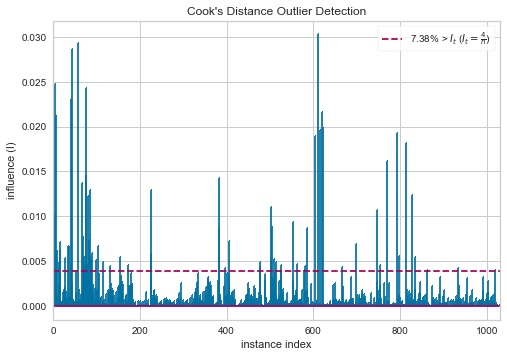

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [33]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

# Load the regression dataset
x1, y1 = load_concrete()

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(x1, y1)
visualizer.show()

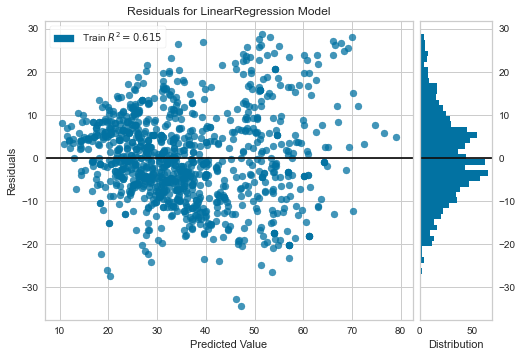

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [34]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

# Instantiate and fit the visualizer
model3 = LinearRegression()
visualizer_residuals = ResidualsPlot(model3)
visualizer_residuals.fit(x1, y1)
visualizer_residuals.show()

In [35]:
df_combine.columns = ['X1','X2','X3','X4','X5','X6','X7','X8']

In [36]:
from statsmodels.formula.api import ols
lm = ols("X8 ~ X1+X2+X3+X4+X5+X6+X7", data=df_combine).fit()

In [37]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     X8   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           4.10e-86
Time:                        14:22:24   Log-Likelihood:                -359.92
No. Observations:                 414   AIC:                             735.8
Df Residuals:                     406   BIC:                             768.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0586      0.029     -2.015      0.0

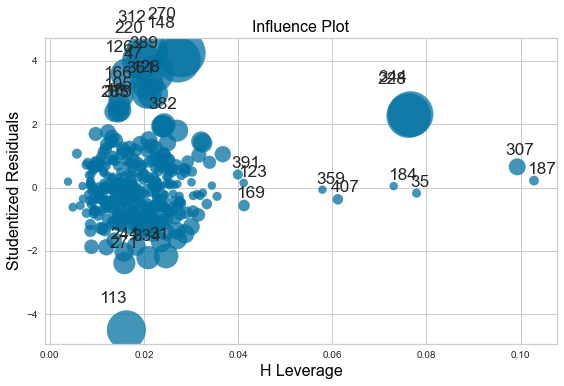

In [38]:
fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=1.0)

In [39]:
# obtain Cook's distance 
lm_cooksd = lm.get_influence().cooks_distance[0]

In [40]:
n = len(df_combine["X1"])
print(n)

414


In [41]:
# calculate critical d
critical_d = 4/n
print('Critical Cooks distance:', critical_d)

Critical Cooks distance: 0.00966183574879227


In [42]:
out_d = lm_cooksd > critical_d

In [43]:
print(df_combine.index[out_d], "\n", 
    lm_cooksd[out_d])

Int64Index([ 15,  16,  31,  47, 105, 113, 126, 128, 148, 166, 194, 220, 228,
            270, 271, 285, 312, 326, 334, 344, 361, 379, 382, 389],
           dtype='int64') 
 [0.01117128 0.01120809 0.01467161 0.02846412 0.01240172 0.03990963
 0.02572651 0.02407583 0.05494495 0.01580212 0.01146935 0.03868257
 0.05269286 0.062288   0.01136181 0.00993356 0.04656447 0.01136965
 0.01293937 0.05527088 0.02270546 0.01043784 0.01220158 0.03593881]


In [44]:
df_combine.loc[[ 31,  47, 105, 113, 116, 126, 128, 148, 166, 194, 220, 228, 270,
            312, 334, 344, 361, 382, 389],]

,X1,X2,X3,X4,X5,X6,X7,X8
31,1.043446,-0.249172,0.986500,1.110371,0.046843,0.014749,1.566375,-0.953971
47,1.596442,-0.351116,-0.371475,0.531815,0.246880,1.235937,-0.184792,1.728573
105,-1.554758,-0.626640,0.647006,0.677663,0.731008,-1.206439,-1.036014,2.426769
113,-0.255656,-0.547199,0.647006,-0.589038,0.310084,0.014749,1.242509,-2.232773
116,1.157556,1.674995,-1.050463,-2.037040,-1.751858,-1.206439,-1.250969,-1.894699
126,1.833440,-0.221214,-0.031981,0.753407,0.091803,-1.206439,-1.316888,1.831465
128,2.070439,-0.759755,0.647006,-0.184532,0.457994,-1.206439,-1.474522,1.669777
148,-0.115213,1.674995,-1.389957,-2.230430,-1.389902,1.235937,0.124743,0.523266
166,-1.554758,-0.626640,0.647006,0.677663,0.731008,1.235937,1.480393,2.617855
194,-0.220545,1.674995,-1.389957,-2.230430,-1.419224,0.014749,1.018956,-0.637945


In [45]:
new_data = df_combine.drop([ 31,  47, 105, 113, 116, 126, 128, 148, 166, 194, 220, 228, 270,
            312, 334, 344, 361, 382, 389])

In [46]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 413
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      395 non-null    float64
 1   X2      395 non-null    float64
 2   X3      395 non-null    float64
 3   X4      395 non-null    float64
 4   X5      395 non-null    float64
 5   X6      395 non-null    float64
 6   X7      395 non-null    float64
 7   X8      395 non-null    float64
dtypes: float64(8)
memory usage: 27.8 KB


In [47]:
x4 = new_data.drop('X8',axis=1)
y4 = new_data['X8']
x4.head()

,X1,X2,X3,X4,X5,X6,X7
0,1.254111,-0.791537,2.004982,1.124070,0.448220,-1.206439,-1.021683
1,0.156896,-0.615866,1.665488,0.911342,0.400654,0.014749,0.884251
2,-0.387322,-0.413515,0.307513,1.485063,0.687352,1.235937,0.368359
3,-0.387322,-0.413515,0.307513,1.485063,0.687352,0.014749,-0.161864
4,-1.115873,-0.549332,0.307513,0.833180,0.592220,-1.206439,-1.262433


In [48]:
#Step 4: Split the data into x_train and x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=50)


In [49]:
import statsmodels.api as sm
lin_reg_model_4 = sm.OLS(y4_train, x4_train).fit()
lin_reg_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     X8   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              136.2
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                    1.61e-90
Time:                        14:22:26   Log-Likelihood:                         -191.35
No. Observations:                 316   AIC:                                      396.7
Df Residuals:                     309   BIC:                                      423.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -0.2707      0.026    -10.541      0.000      -0.321      -0.220
X2            -0.5792      0.062     -9.291      0.000      -0.702      -0.457
X3             0.1934      0.033      5.940      0.000       0.129       0.257
X4             0.2267      0.037      6.184      0.000       0.155       0.299
X5            -0.0149      0.040     -0.369      0.713      -0.094       0.065
X6             0.0027      0.038      0.071      0.944      -0.073       0.078
X7             0.0389      0.038      1.011      0.313      -0.037       0.115
==============================================================================
Omnibus:                        2.243   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.958
Skew:                           0.173   Prob(JB):                        0.376
Kurtosis:                       3.170   Cond. No.                         4.18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that after removing the influencial values the model's performance has improves significantly. 

In [50]:
predictions_model_4 = lin_reg_model_4.predict(x4_test)
predictions_model_4

402    0.372166
35    -0.548669
29     0.655310
195    0.145305
229   -1.027947
133    0.827570
408   -0.729920
32    -0.320633
325    0.116172
158    0.647257
198    0.222309
248   -0.359138
190    0.230240
237    0.109320
38     0.705135
225    0.804829
405    0.195690
404    0.737457
282   -0.313276
360    0.751706
283   -0.588976
212   -0.081099
65     0.339361
11     1.194610
20    -0.329431
144   -0.468390
102    0.874525
205   -0.035346
350    0.387369
119    0.632222
69     0.706962
374    0.867595
376   -0.414288
211    0.721600
367   -0.484210
83    -1.095893
149    0.389274
265    0.397953
348    0.959430
2      0.747957
79    -0.688306
100    0.411968
208   -0.564019
131   -0.368665
89    -1.780396
127    0.939800
295   -0.676659
273    0.453341
117   -1.586816
293    0.591656
193    0.805706
186   -0.797218
254    1.040458
1      0.871389
159    0.299913
176   -1.460323
152   -0.500599
48    -1.827103
235    0.635492
308    0.630511
143    0.384106
303   -0.392248
246    0

In [51]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y4_test, predictions_model_4)
rmse = np.sqrt(mse)
rmse

0.4887028964936569

# CART

In [52]:
x5 = df.drop(["House price of unit area"],axis =1)
y5 = df["House price of unit area"]

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x5, y5, test_size=0.3, random_state=100)


In [54]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 100, max_depth=5) 
# fit the regressor with X and Y data
regressor = regressor.fit(x_train, y_train)


In [55]:
y_pred = regressor.predict(x_test)

y_pred

from sklearn.metrics import mean_squared_error

mse3 = mean_squared_error(y_test, y_pred)
rmse3 = np.sqrt(mse3)
print("RMSE:",rmse3)
print("MSE:",mse3)


RMSE: 6.692502359604401
MSE: 44.78958783331047


In [56]:
from sklearn import tree

plt.figure(figsize=(30,30), dpi=500)
tree.plot_tree(regressor)
plt.show()

The RMSE of the model after removing influencial values is much lower than the model with CART.

We can see that the best model is when we remove the influencial values with the help of Cook's distance and then create a model on the normalized data. 